# Adaptive Thresholding

In [1]:
# From scratch for 1D dataset

In [2]:
dataset = [-1,27,31,2,59,3,61,34,0,12]
T0 = 3

In [16]:
def adap_thres(dataset, ti, epsilon=0.01):
    if len(dataset)==0:
        return
    tf = 100000
    while abs(tf-ti)>epsilon:
        sl = []
        sh = []
        for i in dataset:
            if i > tf:
                sh.append(i)
            else:
                sl.append(i)
        if len(sl)==0:
            ul = 0
        else:
            ul = sum(sl)/len(sl)
        if len(sh)==0:
            uh = 0
        else:
            uh= sum(sh)/len(sh)
        ti = tf
        tf = (ul + uh)/2
        print(sh)
        print(sl)
        print(tf)
        print("*"*10)
    return tf

In [27]:
adap_thres(dataset, 22.8)

[]
[-1, 27, 31, 2, 59, 3, 61, 34, 0, 12]
11.4
**********
[27, 31, 59, 61, 34, 12]
[-1, 2, 3, 0]
19.166666666666668
**********
[27, 31, 59, 61, 34]
[-1, 2, 3, 0, 12]
22.8
**********
[27, 31, 59, 61, 34]
[-1, 2, 3, 0, 12]
22.8
**********


22.8

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#! pip install opencv-python

# Test Image

<class 'numpy.ndarray'>


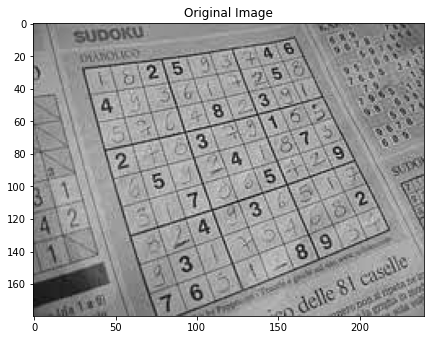

In [4]:
org_img = cv2.imread('download.jfif',0)
print(type(org_img))
plt.figure(figsize=(7,6))
plt.title("Original Image")
plt.imshow(org_img,'gray')

In [6]:
org_img.shape

(180, 240)

# Result after various thresholding schemes

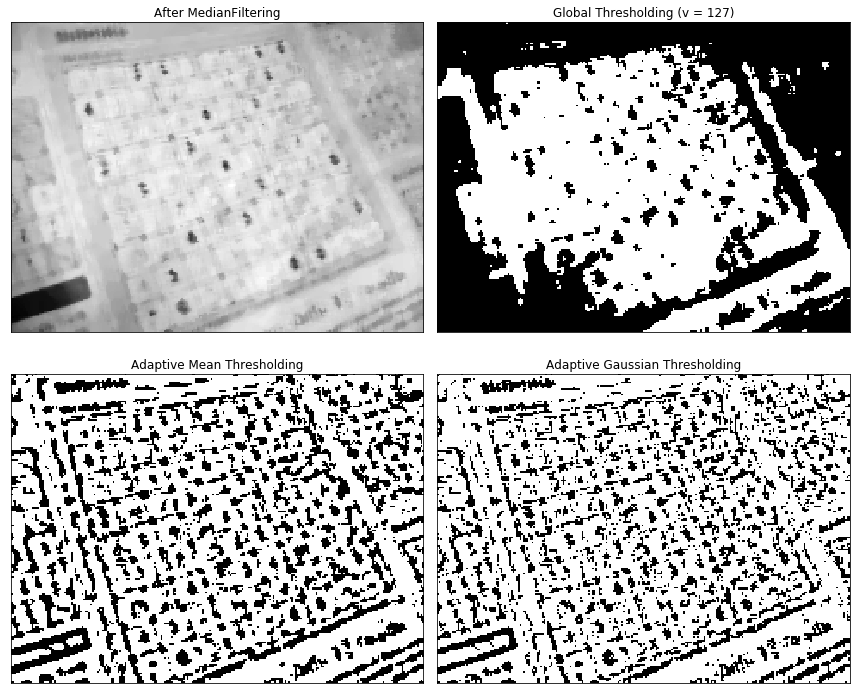

In [70]:
img = cv2.medianBlur(org_img,5) ## Remove noise using median Blur

## 2nd argument - threshold, 3rd Argument - Value assigned if pixel is greater than threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

## threshold value is the mean of neighbourhood area
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)

## threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2) 

titles = ['After MedianFiltering','Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.tight_layout()
plt.show()


---
# Result after Otsu's thresholding

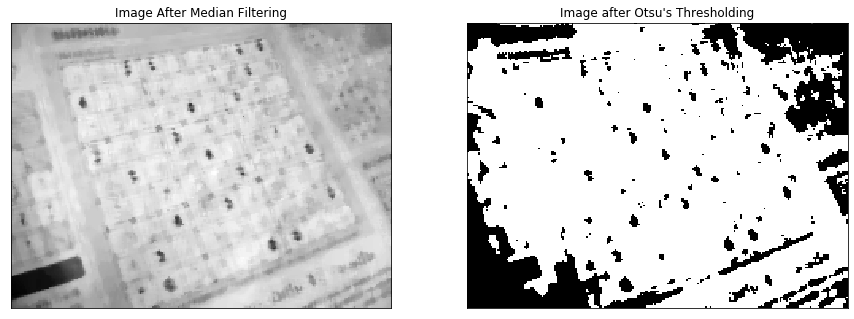

In [71]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image After Median Filtering")

plt.subplot(1,2,2)
plt.imshow(th2,'gray')
plt.xticks([]),plt.yticks([])
plt.title("Image after Otsu's Thresholding")
plt.show()